# ASSIGNMENT 3 - Team 8

## Headers

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split

## Assumptions

* According to the pre-processing problem statement, we have assumed that we have to first prune out the transactions with the movie ratings less than 2. Further to that, we have pruned out those transactions where the Users have rated less than 10 different movies

## Data preprocessing

In [3]:
df = pd.read_csv("ml-latest-small/ratings.csv")

# rating of the movies should be greater than 2
df = df[df["rating"] > 2]

# keeping only those users with more than 10 movies rated
user_counts = df.groupby("userId")["movieId"].count()
valid_users = user_counts[user_counts > 10].index
df = df[df["userId"].isin(valid_users)]

# breaking the data into train and test (20% for testing for EACH user)
train_set = {}
test_set = {}

for user, group in df.groupby("userId"):
    train, test = train_test_split(group, test_size=0.2, random_state=42)
    train_set[user] = list(train["movieId"])
    test_set[user] = list(test["movieId"])

In [4]:
# new data for Training
train_set

{1: [1136,
  1031,
  2054,
  2090,
  3450,
  1270,
  1408,
  1517,
  1967,
  661,
  441,
  2018,
  2944,
  3034,
  163,
  1197,
  543,
  349,
  1777,
  1127,
  1210,
  70,
  1032,
  1920,
  2141,
  2137,
  1097,
  2174,
  2991,
  4006,
  553,
  223,
  596,
  527,
  780,
  2058,
  1927,
  2450,
  1024,
  2899,
  2872,
  1220,
  736,
  1473,
  2143,
  1224,
  2478,
  480,
  3439,
  2987,
  2078,
  1,
  6,
  1222,
  940,
  1580,
  1793,
  2139,
  2571,
  1348,
  1275,
  2528,
  2406,
  1552,
  608,
  2105,
  1080,
  367,
  2366,
  2502,
  592,
  216,
  3740,
  2797,
  101,
  500,
  2161,
  3671,
  3702,
  2459,
  50,
  2046,
  590,
  2542,
  1089,
  2093,
  3527,
  2648,
  1198,
  2692,
  1092,
  919,
  2353,
  733,
  2048,
  423,
  2641,
  2596,
  1256,
  673,
  3729,
  943,
  1445,
  2654,
  804,
  2329,
  2470,
  47,
  1644,
  1029,
  2115,
  3273,
  2949,
  3448,
  1009,
  1240,
  593,
  110,
  1804,
  1377,
  1265,
  3168,
  3386,
  1298,
  151,
  231,
  1060,
  2997,
  2099,
  316,


## Functions Implemented

In [17]:
# Association rule mining functions
def support(movies):
    matching_users = [
        user for user in train_set if all(movie in train_set[user] for movie in movies)
    ]
    return len(matching_users) / len(train_set)


def generate_frequent_itemsets(k, minsup, prev_frequent_itemsets):
    if k == 1:
        return [([movie], sup) for movie, sup in asr_movies_sup.items()]

    candidates = set()
    for i in range(len(prev_frequent_itemsets)):
        for j in range(i + 1, len(prev_frequent_itemsets)):
            itemset1 = set(prev_frequent_itemsets[i][0])
            itemset2 = set(prev_frequent_itemsets[j][0])
            new_itemset = itemset1.union(itemset2)
            if len(new_itemset) == k:
                candidates.add(tuple(sorted(new_itemset)))

    return [
        (list(itemset), support(itemset))
        for itemset in candidates
        if support(itemset) >= minsup
    ]


def generate_association_rules(frequent_itemsets, minconf):
    rules = []
    for itemset, sup in frequent_itemsets:
        if len(itemset) > 1:  # We need at least 2 items to form a rule
            for i in range(len(itemset)):
                antecedent = [itemset[i]]
                consequent = [item for j, item in enumerate(itemset) if j != i]
                conf = sup / support(antecedent)
                if conf >= minconf:
                    rules.append((antecedent, consequent, sup, conf))
    return rules

## Part 1

In [18]:
# setting our own parameters
minsup = 0.09
minconf = 0.1

# getting unique movies in the training set
movies_train_unique = set(
    movie for user_movies in train_set.values() for movie in user_movies
)

# calculating support for individual movies
asr_movies_sup = {
    movie: support([movie])
    for movie in movies_train_unique
    if support([movie]) >= minsup
}

# generating frequent itemsets
frequent_itemsets = [generate_frequent_itemsets(1, minsup, [])]
k = 2
while True:
    frequent_k = generate_frequent_itemsets(k, minsup, frequent_itemsets[-1])
    if not frequent_k:
        break
    frequent_itemsets.append(frequent_k)
    k += 1

# now generating association rules
all_rules = []
for itemsets in frequent_itemsets[1:]:  # Start from 2-itemsets
    all_rules.extend(generate_association_rules(itemsets, minconf))

# filtering and keeping rules where X contains a single movie
final_rules = [rule for rule in all_rules if len(rule[0]) == 1]

# printing all associations found
print(f"Number of association rules found: {len(final_rules)}")
for rule in final_rules:  # Print first 10 rules as an example
    print(f"{rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})")

Number of association rules found: 1979
[50] -> [480] (Support: 0.0923, Confidence: 0.4000)
[480] -> [50] (Support: 0.0923, Confidence: 0.3111)
[356] -> [592] (Support: 0.1301, Confidence: 0.3319)
[592] -> [356] (Support: 0.1301, Confidence: 0.5725)
[318] -> [6874] (Support: 0.0988, Confidence: 0.2400)
[6874] -> [318] (Support: 0.0988, Confidence: 0.6061)
[318] -> [592] (Support: 0.1252, Confidence: 0.3040)
[592] -> [318] (Support: 0.1252, Confidence: 0.5507)
[356] -> [1210] (Support: 0.1318, Confidence: 0.3361)
[1210] -> [356] (Support: 0.1318, Confidence: 0.5517)
[47] -> [589] (Support: 0.1120, Confidence: 0.4533)
[589] -> [47] (Support: 0.1120, Confidence: 0.4359)
[318] -> [1210] (Support: 0.1120, Confidence: 0.2720)
[1210] -> [318] (Support: 0.1120, Confidence: 0.4690)
[2571] -> [7361] (Support: 0.1153, Confidence: 0.3256)
[7361] -> [2571] (Support: 0.1153, Confidence: 0.6422)
[110] -> [296] (Support: 0.1631, Confidence: 0.5531)
[296] -> [110] (Support: 0.1631, Confidence: 0.4231)


## Part 2

In [20]:
# sorting rules by support (descending order)
top_100_support = sorted(final_rules, key=lambda x: x[2], reverse=True)[:100]

# sorting rules by confidence (descending order)
top_100_confidence = sorted(final_rules, key=lambda x: x[3], reverse=True)[:100]

# finding common rules in both sets
common_rules = set(tuple(rule) for rule in top_100_support) & set(
    tuple(rule) for rule in top_100_confidence
)

# sorting common rules by confidence
common_rules_sorted = sorted(common_rules, key=lambda x: x[3], reverse=True)

# printing results
# print("Top 100 rules by support:")
# for i, rule in enumerate(top_100_support[:10], 1):  # Print first 10 as an example
#     print(
#         f"{i}. {rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})"
#     )

# print("\nTop 100 rules by confidence:")
# for i, rule in enumerate(top_100_confidence[:10], 1):  # Print first 10 as an example
#     print(
#         f"{i}. {rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})"
#     )

print(f"\nNumber of common rules: {len(common_rules)}")
print("\nCommon rules sorted by confidence:")
for i, rule in enumerate(common_rules_sorted, 1):
    print(
        f"{i}. {rule[0]} -> {rule[1]} (Support: {rule[2]:.4f}, Confidence: {rule[3]:.4f})"
    )

TypeError: unhashable type: 'list'

## Part 3

[0.000503386417719202, 0.0005177688867968933, 0.0004470457725199308, 0.0004070161837387344, 0.0003917380828445551, 0.0003666148455808989, 0.0003864380580470641, 0.00037094820908386704, 0.0003657331136738056, 0.0003590588434081021]
[0.0001497678598172832, 0.0002995357196345664, 0.00036761201955151337, 0.0004288806894767656, 0.0004969569893937125, 0.0005378027693438807, 0.0006467248492109957, 0.0006943782591528585, 0.0007556469290781108, 0.0008101079690116683]


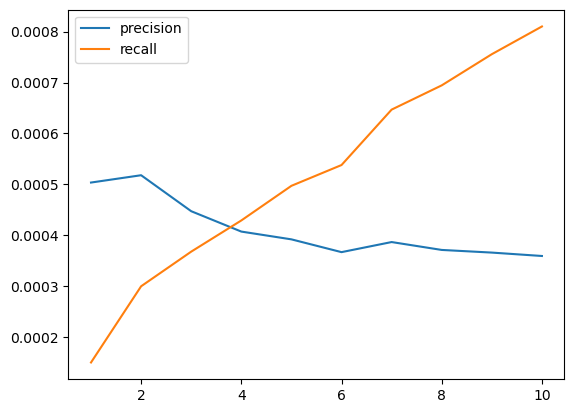

In [ ]:
precision_avgs = []
recall_avgs = []
for k in range(1, 11):
    for user in train_set:
        train = train_set[user]
        if user in test_set:
            test = test_set[user]
            recall_sum = 0
            precision_sum = 0
            recommendation = []
            for x in train:
                y = []
                count = 0
                for asr in conf_rules:
                    if int(asr[0][0]) == int(x):
                        y = y + asr[1]
                        count += 1
                        if count == k:
                            break
                recommendation = recommendation + y
            hitset = []
            for m in recommendation:
                if m in test:
                    hitset.append(m)
            recall = len(hitset) / len(test)
            if len(recommendation) == 0:
                precision = 0
            else:
                precision = len(hitset) / len(recommendation)
            recall_sum += recall
            precision_sum += precision
    recall_avg = recall_sum / len(train_set)
    precision_avg = precision_sum / len(train_set)
    precision_avgs.append(precision_avg)
    recall_avgs.append(recall_avg)

print(precision_avgs)
print(recall_avgs)

x = [i for i in range(1, 11)]
plt.plot(x, precision_avgs, label="precision")
plt.plot(x, recall_avgs, label="recall")
plt.legend()

Decreasing Precision: On increasing the number of rules (k), the average precision is likely to decrease. This is because with more rules, we are recommending a larger set of items, and some of those recommendations may not be relevant to the user. As a result, the precision, which measures how many of the recommended items are relevant, tends to decrease as k increases.

Increasing Recall: On the other handOn increasing the number of rules (e) N, the average recall is likely to increase. This is because with more rulesweou are recommending a larger set of items, which is more likely to include some of the relevant items from the test set. Recall measures how many of the relevant items are included in the recommendations, and aweou provide more recommendationsweou are more likely to cover a larger portion of the relevant items.

Trade-off Between Precision and Recall: The graph will likely show a trade-off between precision and recall. Wwe you have fewer rules (loker we you have a higher precision but a lower recall, and wwe you have more rules (higker we you have a higher recall but a lower precisces.

In [ ]:
# New code

precision_avgs = []
recall_avgs = []

for k in range(1, 11):
    recall_sum = 0
    precision_sum = 0
    user_count = 0

    for user in train_set:
        if user in test_set:
            user_count += 1
            train = train_set[user]
            test = test_set[user]
            recommendation = set()

            for x in train:
                count = 0
                for rule in conf_rules:
                    if int(rule[0][0]) == int(x):  # X is a single item
                        recommendation.update(rule[1])  # Y is an itemset
                        count += 1
                        if count == k:
                            break

            hitset = recommendation.intersection(test)
            recall = len(hitset) / len(test) if test else 0
            precision = len(hitset) / len(recommendation) if recommendation else 0

            recall_sum += recall
            precision_sum += precision

    recall_avg = recall_sum / user_count if user_count > 0 else 0
    precision_avg = precision_sum / user_count if user_count > 0 else 0
    precision_avgs.append(precision_avg)
    recall_avgs.append(recall_avg)

print("Precision averages:", precision_avgs)
print("Recall averages:", recall_avgs)

x = list(range(1, 11))
plt.figure(figsize=(10, 6))
plt.plot(x, precision_avgs, label="Precision", marker="o")
plt.plot(x, recall_avgs, label="Recall", marker="s")
plt.xlabel("Number of Rules (k)")
plt.ylabel("Average Score")
plt.title("Precision and Recall vs Number of Rules")
plt.legend()
plt.grid(True)
plt.show()

KeyboardInterrupt: 

## Part 4

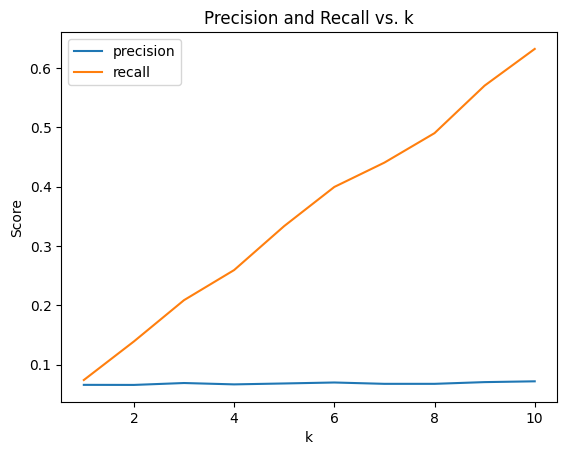

In [ ]:
import random
import matplotlib.pyplot as plt

sample_size = 20
sample_users = random.sample(list(test_set.keys()), sample_size)

precision_avgs = []
recall_avgs = []

for k in range(1, 11):
    recall_sum = 0
    precision_sum = 0

    for user in sample_users:
        train = train_set[user]
        if user in test_set:
            test = test_set[user]
            recommendation = []

            for x in train:
                y = []
                count = 0
                for asr in conf_rules:
                    if int(asr[0][0]) == int(x):
                        y = y + asr[1]
                        count += 1
                        if count == k:
                            break
                recommendation = recommendation + y

            hit_set = [m for m in recommendation if m in test]

            recall = len(hit_set) / len(test)
            precision = (
                len(hit_set) / len(recommendation) if len(recommendation) > 0 else 0
            )

            recall_sum += recall
            precision_sum += precision

    recall_avg = recall_sum / sample_size
    precision_avg = precision_sum / sample_size

    precision_avgs.append(precision_avg)
    recall_avgs.append(recall_avg)

x = [i for i in range(1, 11)]
plt.plot(x, precision_avgs, label="precision")
plt.plot(x, recall_avgs, label="recall")
plt.legend()
plt.xlabel("k")
plt.ylabel("Score")
plt.title("Precision and Recall vs. k")
plt.show()

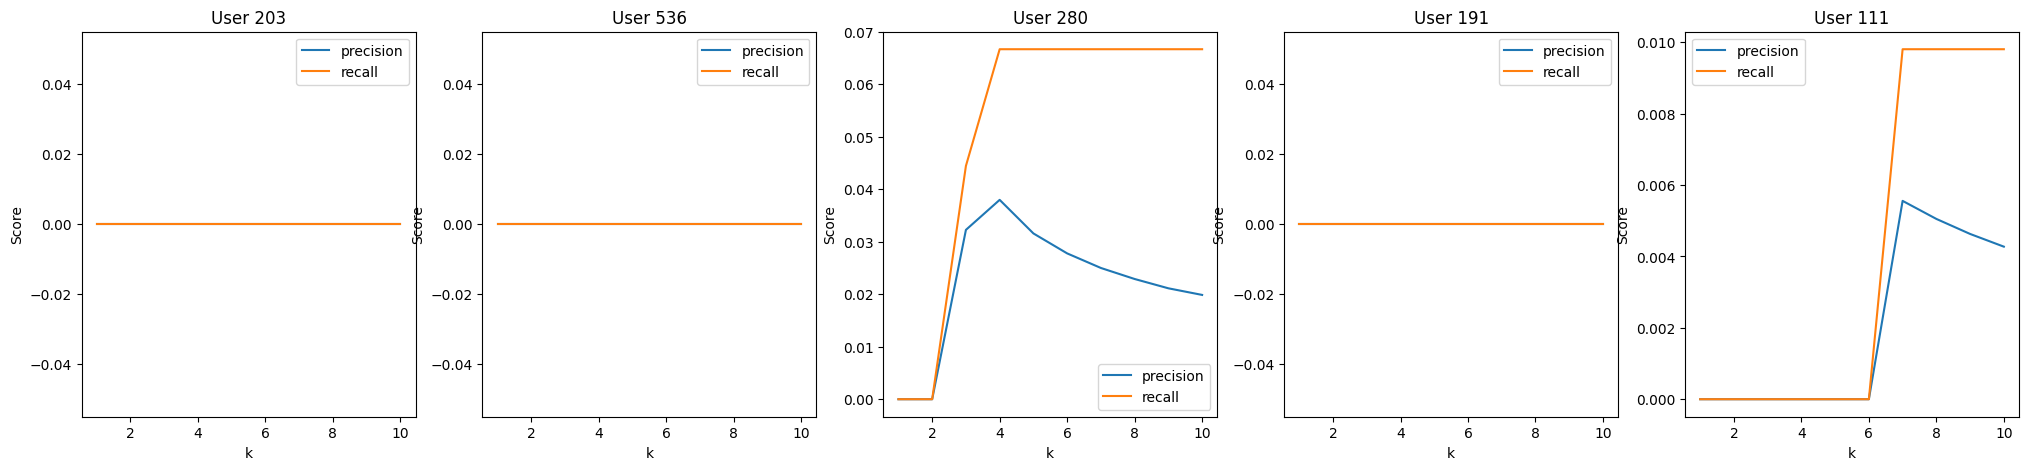

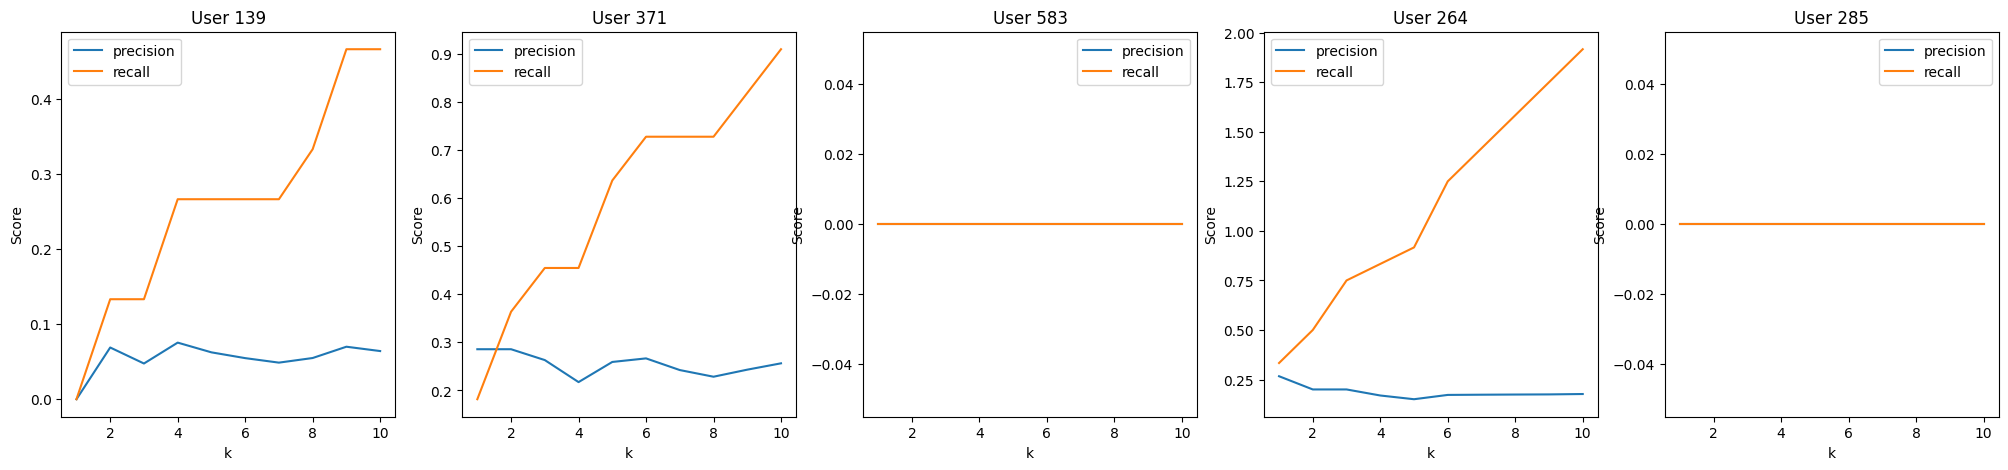

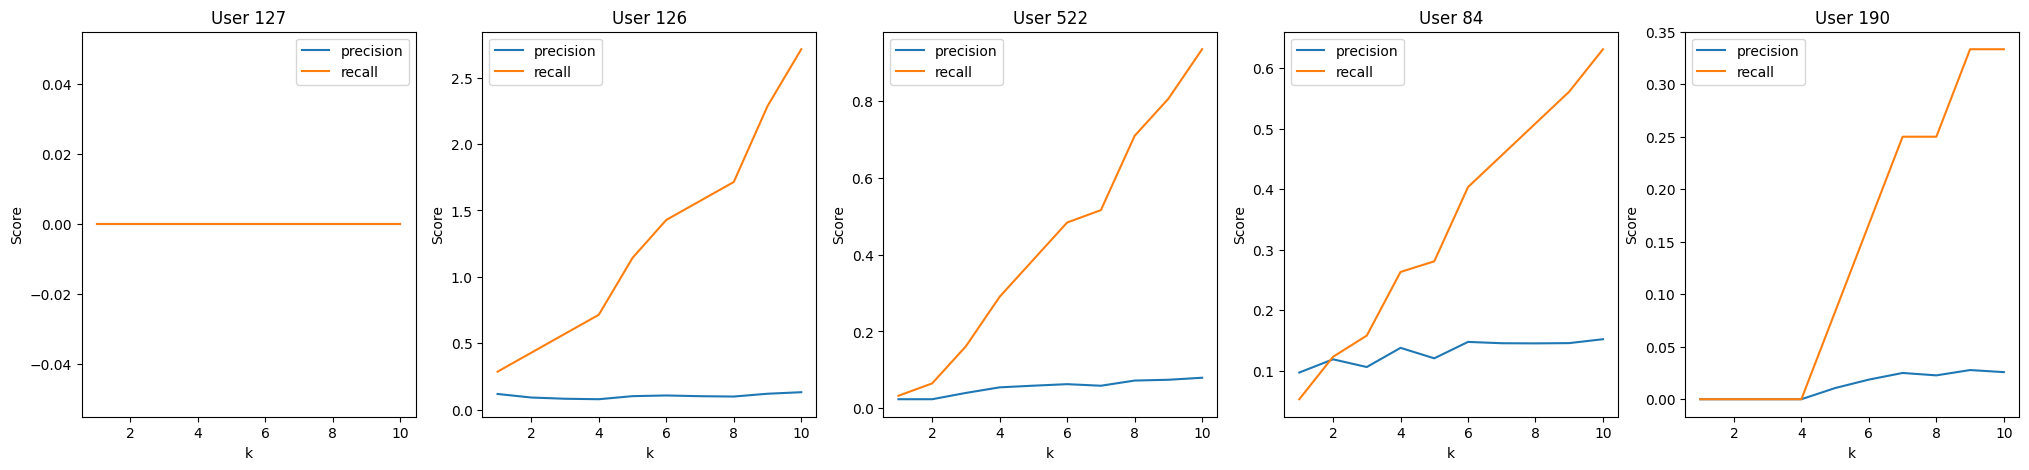

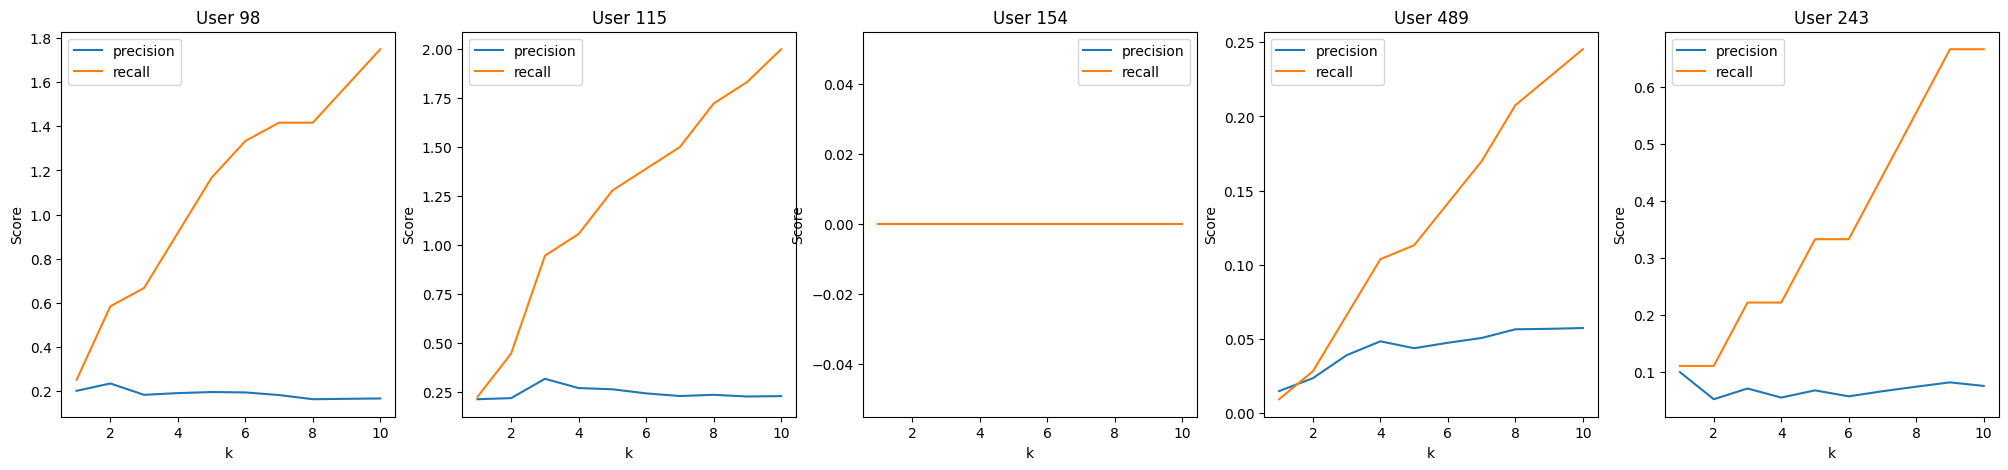

In [ ]:
users_per_row = 5
num_rows = (sample_size + users_per_row - 1) // users_per_row

for row in range(num_rows):
    plt.figure(figsize=(25, 5))

    for col in range(users_per_row):
        index = row * users_per_row + col
        if index >= sample_size:
            break

        user = sample_users[index]
        precision_avgs = []
        recall_avgs = []

        for k in range(1, 11):
            train = train_set[user]
            if user in test_set:
                test = test_set[user]
                recall_sum = 0
                precision_sum = 0
                recommendation = []

                for x in train:
                    y = []
                    count = 0
                    for asr in conf_rules:
                        if int(asr[0][0]) == int(x):
                            y = y + asr[1]
                            count += 1
                            if count == k:
                                break
                    recommendation = recommendation + y

                hit_set = [m for m in recommendation if m in test]

                recall = len(hit_set) / len(test)
                precision = (
                    len(hit_set) / len(recommendation) if len(recommendation) > 0 else 0
                )

                recall_sum += recall
                precision_sum += precision

            recall_avg = recall_sum
            precision_avg = precision_sum

            precision_avgs.append(precision_avg)
            recall_avgs.append(recall_avg)

        x = [i for i in range(1, 11)]
        plt.subplot(1, users_per_row, col + 1)
        plt.plot(x, precision_avgs, label="precision")
        plt.plot(x, recall_avgs, label="recall")
        plt.xlabel("k")
        plt.ylabel("Score")
        plt.title(f"User {user}")
        plt.legend()

    plt.show()